In [55]:
import torch as th
import numpy as np

from sklearn.decomposition import PCA

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from sklearn.preprocessing import StandardScaler

In [56]:
# Import datasets

sep_data = th.load('../datasets/sep_states.pt')

ent_data = th.load('../datasets/ent_states.pt')

sep_data.shape

torch.Size([10000, 4, 4])

In [57]:
data_len = sep_data.shape[0]
full_data_sep = np.ndarray((data_len, 32))
full_data_ent = np.ndarray((data_len, 32))

for i in range(data_len):
    full_data_sep[i] = th.cat((sep_data[i].flatten(start_dim=0).real, sep_data[i].flatten(start_dim=0).imag), dim=0).numpy()
    full_data_ent[i] = th.cat((ent_data[i].flatten(start_dim=0).real, ent_data[i].flatten(start_dim=0).imag), dim=0).numpy()
    
full_data_sep.shape



(10000, 32)

In [58]:
label_sep = th.zeros(full_data_sep.shape[0])
label_ent = th.ones(full_data_sep.shape[0])

labels = th.cat([label_sep, label_ent], dim=0).detach().numpy()

labels.shape, labels.dtype

((20000,), dtype('float32'))

In [59]:
full_dataset = np.concatenate((full_data_sep, full_data_ent), axis=0)
full_dataset.shape

(20000, 32)

In [60]:
scaler = StandardScaler()

full_dataset_norm = scaler.fit_transform(full_dataset)

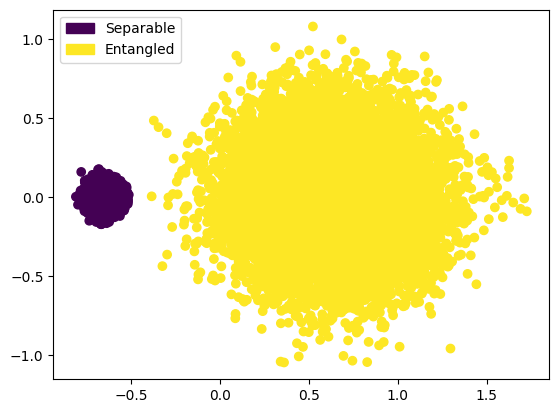

In [61]:
pca_model = PCA()

pca = pca_model.fit_transform(full_dataset)

scatter = plt.scatter(pca[:, 0], pca[:, 1], c=labels)
unique_labels = np.unique(labels)
unique_colors = [scatter.cmap(scatter.norm(label)) for label in unique_labels]
label_names = ['Separable', 'Entangled']
label_name_dict = dict(zip(unique_labels, label_names))
patches = [mpatches.Patch(color=unique_colors[i], label=label_name_dict[label]) for i, label in enumerate(unique_labels)]
plt.legend(handles=patches)

plt.savefig('../Figures/linear_PCA.png')

(array([16.,  0.,  6.,  9.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  1.]),
 array([3.07022592e-33, 1.28689629e-02, 2.57379257e-02, 3.86068886e-02,
        5.14758514e-02, 6.43448143e-02, 7.72137772e-02, 9.00827400e-02,
        1.02951703e-01, 1.15820666e-01, 1.28689629e-01, 1.41558591e-01,
        1.54427554e-01, 1.67296517e-01, 1.80165480e-01, 1.93034443e-01,
        2.05903406e-01, 2.18772369e-01, 2.31641332e-01, 2.44510294e-01,
        2.57379257e-01, 2.70248220e-01, 2.83117183e-01, 2.95986146e-01,
        3.08855109e-01, 3.21724072e-01, 3.34593034e-01, 3.47461997e-01,
        3.60330960e-01, 3.73199923e-01, 3.86068886e-01, 3.98937849e-01,
        4.11806812e-01]),
 <BarContainer object of 32 artists>)

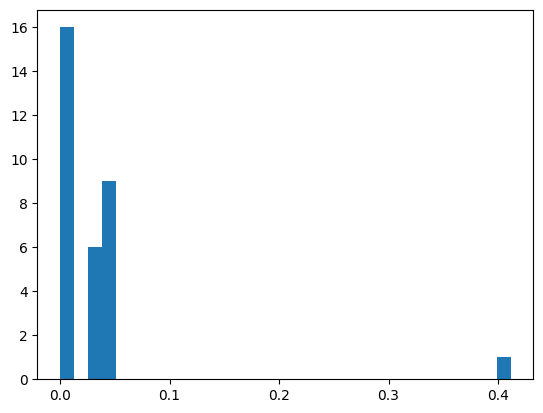

In [62]:
exp_variance = pca_model.fit(full_dataset).explained_variance_ratio_

plt.hist(exp_variance, bins=32)

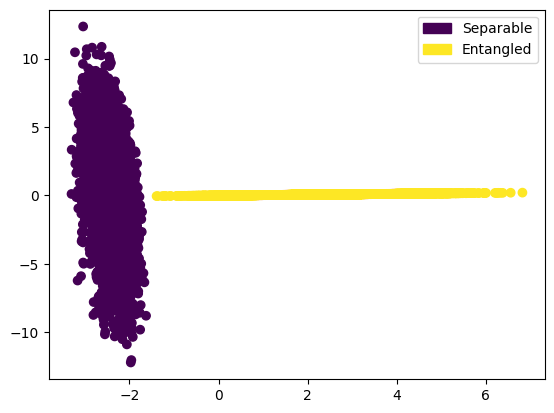

In [63]:
pca_model = PCA()

pca = pca_model.fit_transform(full_dataset_norm)

scatter = plt.scatter(pca[:, 0], pca[:, 1], c=labels)
unique_labels = np.unique(labels)
unique_colors = [scatter.cmap(scatter.norm(label)) for label in unique_labels]
label_names = ['Separable', 'Entangled']
label_name_dict = dict(zip(unique_labels, label_names))
patches = [mpatches.Patch(color=unique_colors[i], label=label_name_dict[label]) for i, label in enumerate(unique_labels)]
plt.legend(handles=patches)

(array([12.,  0., 10.,  6.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  2.,  0.,  0.,  0.,  1.]),
 array([7.68135511e-34, 7.23668265e-03, 1.44733653e-02, 2.17100480e-02,
        2.89467306e-02, 3.61834133e-02, 4.34200959e-02, 5.06567786e-02,
        5.78934612e-02, 6.51301439e-02, 7.23668265e-02, 7.96035092e-02,
        8.68401918e-02, 9.40768745e-02, 1.01313557e-01, 1.08550240e-01,
        1.15786922e-01, 1.23023605e-01, 1.30260288e-01, 1.37496970e-01,
        1.44733653e-01, 1.51970336e-01, 1.59207018e-01, 1.66443701e-01,
        1.73680384e-01, 1.80917066e-01, 1.88153749e-01, 1.95390432e-01,
        2.02627114e-01, 2.09863797e-01, 2.17100480e-01, 2.24337162e-01,
        2.31573845e-01]),
 <BarContainer object of 32 artists>)

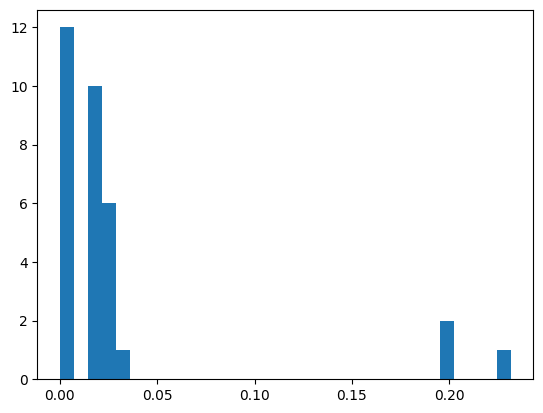

In [64]:
exp_variance = pca_model.fit(full_dataset_norm).explained_variance_ratio_

plt.hist(exp_variance, bins=32)